# **CLASSIFICATION**

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 1.Splitting the Data
### Loading the Data

In [5]:
df = pd.read_csv('UCI_CRERDITCARD.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102.0,689.0,0,0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682,1725.0,2682.0,3272,3455,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239,14027.0,13559.0,14331,14948,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990,48233.0,49291.0,28314,28959,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617,5670.0,35835.0,20940,19146,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Data set description
There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
print(df.columns)
print(df.shape)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')
(4998, 25)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          4998 non-null   int64  
 1   LIMIT_BAL                   4998 non-null   float64
 2   SEX                         4998 non-null   int64  
 3   EDUCATION                   4998 non-null   int64  
 4   MARRIAGE                    4998 non-null   int64  
 5   AGE                         4998 non-null   int64  
 6   PAY_0                       4998 non-null   int64  
 7   PAY_2                       4998 non-null   int64  
 8   PAY_3                       4998 non-null   int64  
 9   PAY_4                       4998 non-null   int64  
 10  PAY_5                       4998 non-null   int64  
 11  PAY_6                       4998 non-null   int64  
 12  BILL_AMT1                   4998 non-null   int64  
 13  BILL_AMT2                   4998 

In [6]:
#Checking for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### Randomly adding missing values

As there are no missing values, we have added missing values randomly and later on replaced them with median

In [7]:
print(df.iloc[0:5,0:4])

nan_mat = np.random.random(df.shape)<0.5
nan_mat

nan_mat.sum()

df_NaN = df.mask(nan_mat)
df_NaN = df.mask(np.random.random(df.shape)<0.05)
df_NaN
df_NaN.isnull().sum(axis = 0).sum()

   ID  LIMIT_BAL  SEX  EDUCATION
0   1    20000.0    2          2
1   2   120000.0    2          2
2   3    90000.0    2          2
3   4    50000.0    2          2
4   5    50000.0    1          2


6258

In [8]:
#checking for the missing values
df_NaN.isnull().sum()

ID                            243
LIMIT_BAL                     233
SEX                           267
EDUCATION                     259
MARRIAGE                      258
AGE                           218
PAY_0                         260
PAY_2                         268
PAY_3                         255
PAY_4                         242
PAY_5                         241
PAY_6                         267
BILL_AMT1                     235
BILL_AMT2                     291
BILL_AMT3                     262
BILL_AMT4                     224
BILL_AMT5                     251
BILL_AMT6                     254
PAY_AMT1                      257
PAY_AMT2                      248
PAY_AMT3                      240
PAY_AMT4                      245
PAY_AMT5                      254
PAY_AMT6                      249
default.payment.next.month    237
dtype: int64

In [9]:
##Replace the missing values with the Median
df1 = df_NaN.fillna(df_NaN.median())
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15877.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,4994.0,160000.0,2.0,3.0,1.0,58.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2034.0,68942.0,40194.0,942.0,942.0,942.0,68942.0,40194.0,942.0,942.0,942.0,942.0,0.0
4994,2495.0,500000.0,2.0,1.0,2.0,40.0,-2.0,-2.0,0.0,-2.0,-2.0,-2.0,15929.0,18155.0,-131.0,10527.0,61751.0,2926.0,18222.0,0.0,10658.0,61751.0,2926.0,13609.0,0.0
4995,2495.0,20000.0,2.0,2.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,16320.0,18044.0,19003.0,19224.0,19050.0,19353.0,2000.0,1283.0,1003.0,1000.0,1002.0,1005.0,0.0
4996,4997.0,180000.0,2.0,4.0,1.0,34.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,6892.0,21038.0,6892.0,6282.0,8282.0,15877.0,6892.0,6892.0,6282.0,2000.0,0.0,0.0,0.0


In [9]:
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### Train Test Split
In order to test the models, we have separated the data into smaller train and test datasets.

In [10]:
train, test = train_test_split(df1, test_size = 0.4, random_state = 0)

test_solution = test['default.payment.next.month']
test = test.drop('default.payment.next.month', axis = 1)

## 2. Exploratory Data Analysis

In [11]:
train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,2482.357572,165213.475650,1.595730,1.832221,1.586057,35.481654,0.009006,-0.148099,-0.146097,-0.240827,-0.249833,-0.275517,48178.928953,46611.325217,43548.668112,39364.314543,38356.629086,36608.886591,5385.068712,5499.335223,4429.242829,4861.872915,4600.312208,5189.074716,0.214476
std,1404.876189,128504.674013,0.490832,0.760338,0.519650,9.099907,1.113325,1.163659,1.195030,1.106917,1.102046,1.122825,73775.969188,71871.577566,66359.280249,63686.847990,61372.823932,61101.240515,15187.200235,17518.520013,20282.171152,17394.604091,15101.143929,20539.358739,0.410527
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-24704.000000,-9850.000000,-170000.000000,-20006.000000,-51183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1287.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3196.750000,3078.000000,2883.750000,2120.250000,1664.250000,1096.500000,1000.000000,780.000000,278.250000,300.000000,297.000000,0.000000,0.000000
50%,2496.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21210.500000,20508.000000,19622.000000,17918.000000,17198.000000,15619.000000,2100.000000,2000.000000,1447.000000,1500.000000,1500.000000,1304.000000,0.000000
75%,3675.750000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56984.500000,55352.750000,50550.000000,46454.750000,46202.000000,44213.250000,4957.500000,4275.250000,3500.000000,3611.500000,3578.500000,3510.750000,0.000000
max,4998.000000,1000000.000000,2.000000,6.000000,3.000000,73.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,964511.000000,983931.000000,578971.000000,891586.000000,927171.000000,961664.000000,368199.000000,344261.000000,896040.000000,497000.000000,326889.000000,528666.000000,1.000000


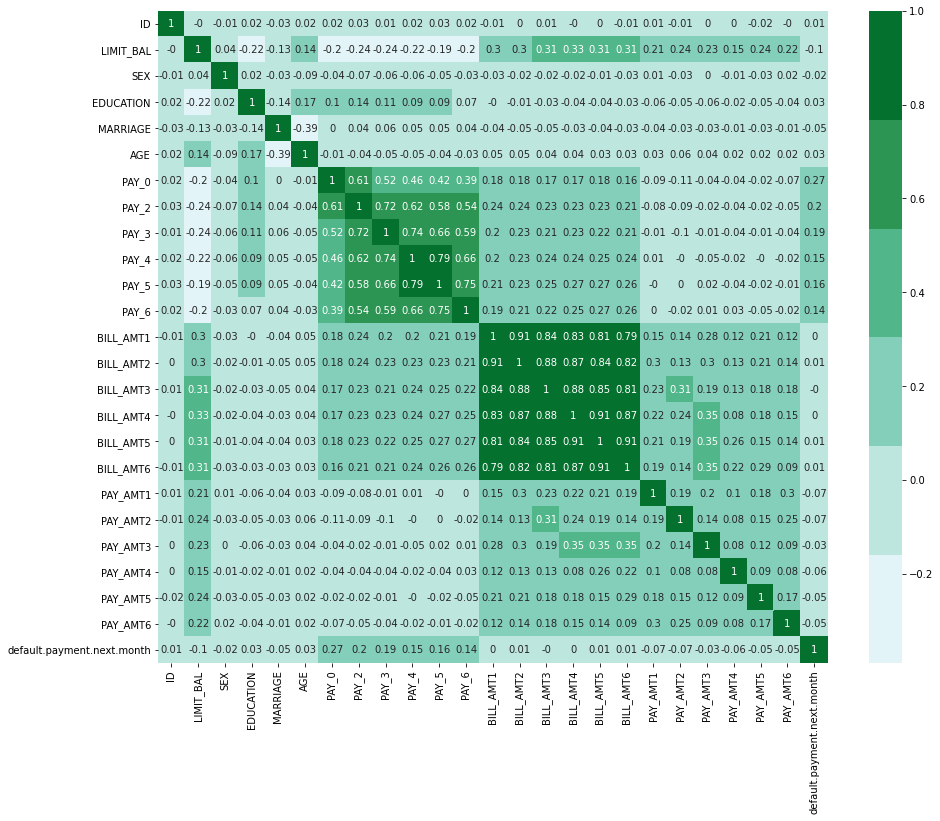

In [12]:
#looking for the strongest predictors
plt.figure(figsize=(15,12))
cor = round(train.corr(),2)
sns.heatmap(cor, cmap = sns.color_palette('BuGn'), annot = True)

**Observation**: The PAY_# variable seems to be the most correlated with the default payment variable.

Based on the data description, the measurement scale for repayment status is as follows:

-1 = pay duly, or paid properly
1 = payment delay for one month
2 = payment delay for 2 months
and so on

**Observation**:
It seems like whether repayment was paid duly or delayed is an important indicator of whether or not default payment will occur next month. 

In [13]:
# Function to get default payment means 
def get_pay_mean(PAY_NUM):
    temp = train[[PAY_NUM, 'default.payment.next.month']].groupby([PAY_NUM], as_index = True).mean()
    pay_mean = temp['default.payment.next.month']
    return pay_mean

In [14]:
pay_means = {}
for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    pay_means[i] = get_pay_mean(i)
pay_means_results = pd.DataFrame(pay_means)
#pay_means_results.reset_index(level=0, inplace=True)
pay_means_results

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2.0,0.096618,0.205797,0.203911,0.218830,0.219753,0.237209
-1.0,0.192751,0.176282,0.158479,0.165247,0.167521,0.173437
0.0,0.131320,0.158604,0.177096,0.187067,0.183246,0.176942
1.0,0.353100,0.000000,0.000000,NaN,NaN,NaN
2.0,0.604839,0.509972,0.442359,0.465587,0.474308,0.448148
3.0,0.523810,0.551724,0.600000,0.500000,0.650000,0.592593
4.0,0.700000,0.428571,0.375000,0.714286,0.300000,0.000000
5.0,1.000000,1.000000,0.750000,0.285714,0.000000,NaN
6.0,1.000000,1.000000,0.400000,0.000000,NaN,0.750000
7.0,1.000000,0.400000,1.000000,1.000000,1.000000,1.000000


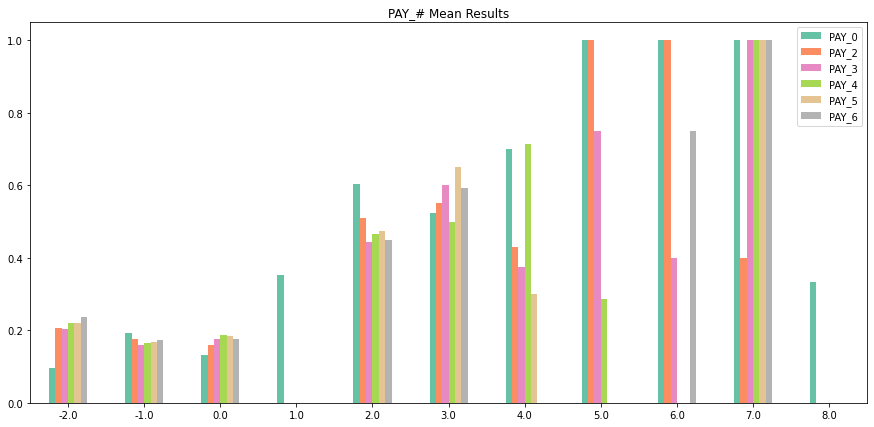

In [15]:
pay_means_results.plot(kind = 'bar', title = 'PAY_# Mean Results', figsize=(15, 7), legend=True, rot = 0, colormap = 'Set2')

**Obseration**: By plotting all the different repayment months , we tried to see if there was any general patterns. Those who paid duly (-2, -1, 0) had the lowest chance of default payment next month and those who paid late, have a higher chance of default payment next month.

**Limit Balance**
LIMIT_BAL corresponds to the given credit of the card holder and its family members. Those with good credit score, and higher income, are granted a higher credit card limit.

Text(0.5, 1.05, 'Limit Balance and Default Rate Distribution')

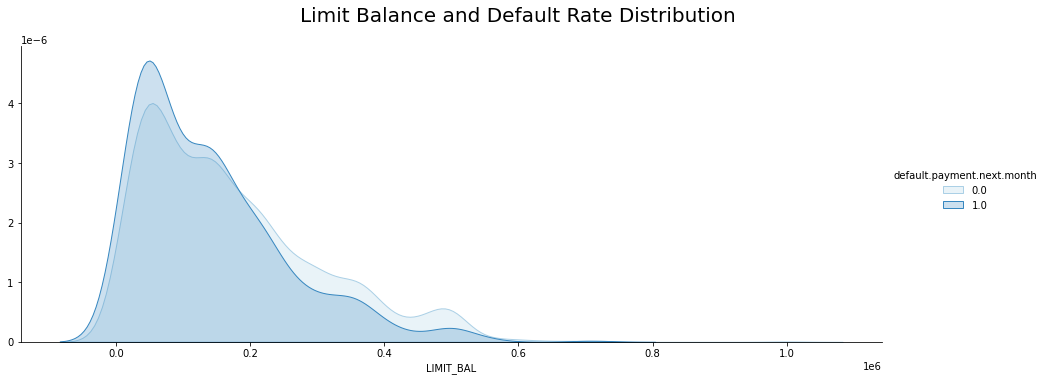

In [16]:
limitBal_survival_dist = sns.FacetGrid(train, hue = 'default.payment.next.month', aspect = 2.5, height = 5, palette = 'Blues')
limitBal_survival_dist.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
limitBal_survival_dist.add_legend()
plt.suptitle('Limit Balance and Default Rate Distribution', fontsize = 20, y = 1.05)

**Observations:**
It seems like those with lower credit limits are more likely to default, whereas those with higher credit limits are less likely to default.

### Exploring the Demographic Variables

**Age**
Based on the table above, 50% of credit card holders fall somewhere between 28-42, with the average at 35. The oldest person with a credit card in the train set is 75 whereas the youngest person is 21.

Text(0.5, 1.05, 'Age and Default Rate Distribution')

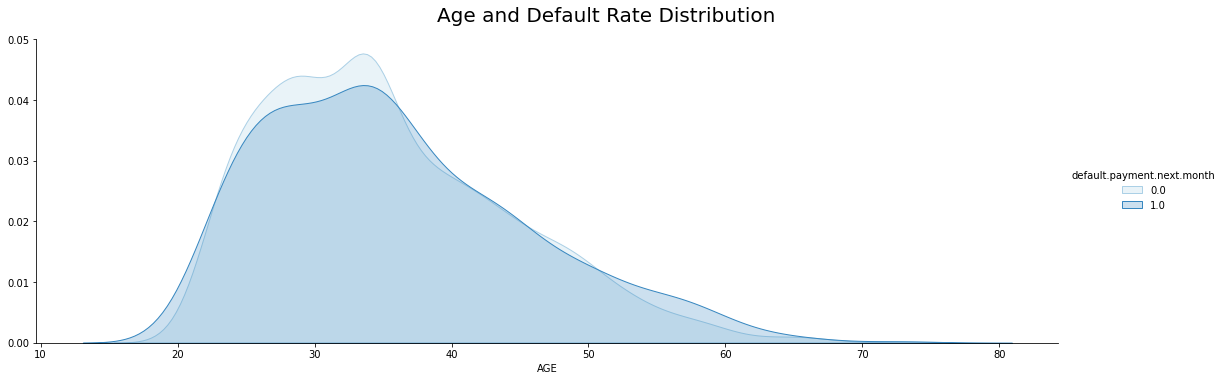

In [17]:
age_survival_dist = sns.FacetGrid(train, hue = 'default.payment.next.month', aspect = 3, height = 5, palette = 'Blues')
age_survival_dist.map(sns.kdeplot, 'AGE', shade = True)
age_survival_dist.add_legend()
plt.suptitle('Age and Default Rate Distribution', fontsize = 20, y = 1.05)

**Observation:**
Based on the graph, the distributions are quite similar and it doesn't seem like age plays a large role in whether or not the card holder will default payment next month. However, those who are in their 25-40 have a slightly lower chance of default.

**Sex**
1 stands for male and 2 stands for female.

In [18]:
train[['SEX', 'default.payment.next.month']].groupby(['SEX'], as_index = False).mean()

,SEX,default.payment.next.month
0,1.0,0.224422
1,2.0,0.207727


**Obseration**:
The difference between being male and female have a very small affect on whether or not the client will default payment next month. There is a slightly higher chance if you are male.

**Marriage**
Marriage is classified into 1 = married, 2 = single and 3 = other.

In [19]:
train[['MARRIAGE', 'default.payment.next.month']].groupby(['MARRIAGE'], as_index = False).mean()

,MARRIAGE,default.payment.next.month
0,0.0,0.000000
1,1.0,0.241297
2,2.0,0.194330
3,3.0,0.257143


**Observation**:
Those who are single have a slightly lower chance of defaulting than married or other.

**Education**
Education is classified as 1 = graduate school, 2 = university, 3 = high school and 4 = other.

In [20]:
train[['EDUCATION', 'default.payment.next.month']].groupby(['EDUCATION'], as_index = False).mean()

,EDUCATION,default.payment.next.month
0,0.0,0.000000
1,1.0,0.196828
2,2.0,0.217330
3,3.0,0.253579
4,4.0,0.000000
5,5.0,0.125000
6,6.0,0.000000


**Observation**:
Those with higher education have a lower chance of defaulting. Those in order have a lower chance of default.

## 3. Data Preprocessing

### Handling the Data

In [11]:
#Cleaning the data
credit_card = train.append(test, ignore_index = True)

credit_card['MARRIAGE'].replace(0, 3, inplace = True)
credit_card['EDUCATION'].replace([0, 5, 6], 4, inplace = True)

### Droping the irrelevant columns

In [12]:
credit_card = credit_card.drop(['ID'], axis = 1)
credit_card.shape

(4998, 24)

In [13]:
train_cleaned = credit_card[0:2499]
test_cleaned = credit_card[2499:4999]

## 4.MODELLING

The algorithms that we have implemented are:

1. Logistic Regression
2. KNN
3. Decision Tree
4. SVM
5. Kernalized SVM

Performance metric used is AUC score.



In [14]:
#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
#from tqdm import tqdm
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [15]:
#train test split
features = train_cleaned.drop('default.payment.next.month', axis=1)
target = train_cleaned['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=0)

### Scaling the data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train

array([[5.00000000e-01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.23172243e-03],
       [1.42857143e-02, 0.00000000e+00, 0.00000000e+00, ...,
        2.01207243e-03, 3.05914240e-03, 2.47831475e-03],
       [4.57142857e-01, 1.00000000e+00, 0.00000000e+00, ...,
        3.82293763e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.42857143e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.41649899e-03, 2.65227646e-03, 1.47955390e-03],
       [5.71428571e-02, 0.00000000e+00, 3.33333333e-01, ...,
        6.92152918e-04, 1.13494183e-03, 7.78190830e-04],
       [2.00000000e-01, 1.00000000e+00, 6.66666667e-01, ...,
        2.31529175e-02, 5.89190826e-03, 1.36604709e-02]])

In [28]:
X_test

array([[0.31428571, 0.        , 0.66666667, ..., 0.0804829 , 0.03670971,
        0.00619579],
       [0.2       , 0.        , 0.        , ..., 0.01408451, 0.00243508,
        0.00202974],
       [0.54285714, 1.        , 0.        , ..., 0.00301811, 0.08863253,
        0.04280297],
       ...,
       [0.11428571, 1.        , 0.33333333, ..., 0.00201207, 0.00305914,
        0.01239157],
       [0.1       , 1.        , 0.33333333, ..., 0.03928169, 0.01005846,
        0.00389095],
       [0.05714286, 1.        , 0.33333333, ..., 0.00202012, 0.00306832,
        0.0015539 ]])

### 4.1 Logistic Regression

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [124]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.794
AUC: 0.6713965820660784
Confusion Matrix: [[761  20]
 [186  33]]
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88       781
         1.0       0.62      0.15      0.24       219

    accuracy                           0.79      1000
   macro avg       0.71      0.56      0.56      1000
weighted avg       0.76      0.79      0.74      1000



In [125]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

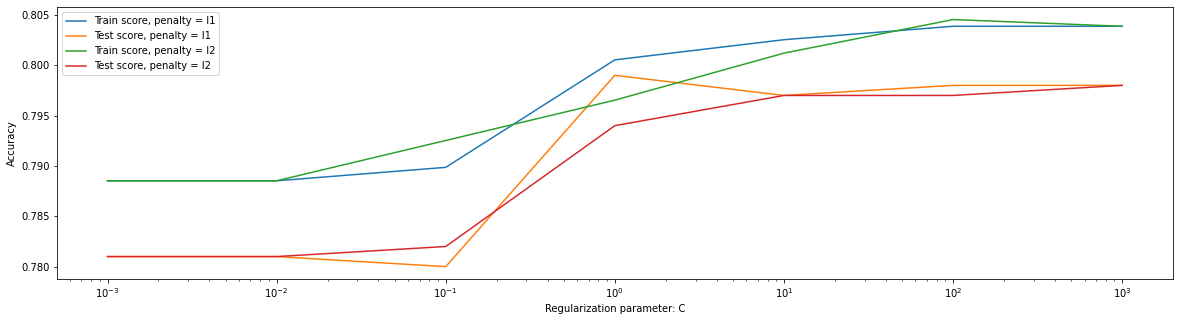

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### Grid search and best hyperparameters

In [35]:
logreg = LogisticRegression(class_weight='balanced')
param1 = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20,100,1000]}
clf1 = GridSearchCV(logreg,param1,scoring='roc_auc',refit=True,cv=5)
clf1.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf1.best_score_, clf1.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best roc_auc: 0.6854, with best C: {'C': 5}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [36]:
y_pred = clf1.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.647
[[523 258]
 [ 95 124]]
              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75       781
         1.0       0.32      0.57      0.41       219

    accuracy                           0.65      1000
   macro avg       0.59      0.62      0.58      1000
weighted avg       0.73      0.65      0.67      1000



### 4.2 K-Nearest Neighbours

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.792
AUC: 0.6206859254322113
Confusion Matrix: [[747  34]
 [174  45]]
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       781
         1.0       0.57      0.21      0.30       219

    accuracy                           0.79      1000
   macro avg       0.69      0.58      0.59      1000
weighted avg       0.76      0.79      0.75      1000



In [39]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

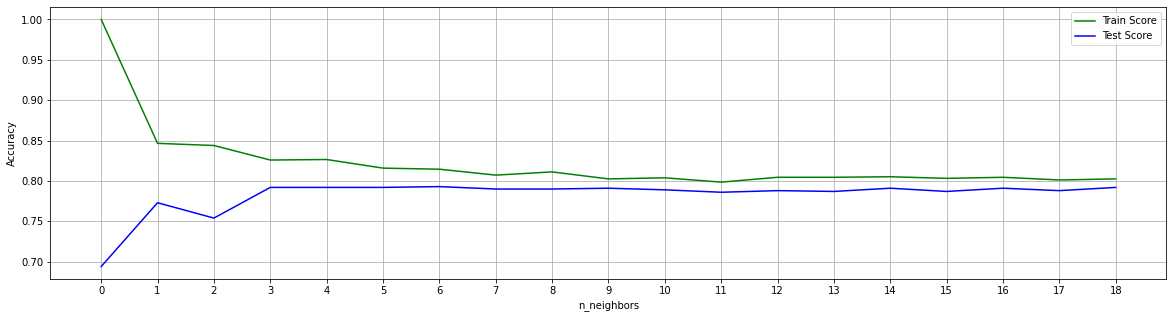

In [40]:
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

### Grid search and best Parameters

In [41]:
k_range = list(range(1, 11))
knn = KNeighborsClassifier()
param2 = dict(n_neighbors=k_range)
clf2 = GridSearchCV(knn, param2,'roc_auc',refit=True,cv=3)
clf2.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf2.best_score_, clf2.best_params_))

Best roc_auc: 0.6277, with best C: {'n_neighbors': 8}


In [42]:
y_pred = clf2.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.79
[[762  19]
 [191  28]]
              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88       781
         1.0       0.60      0.13      0.21       219

    accuracy                           0.79      1000
   macro avg       0.70      0.55      0.54      1000
weighted avg       0.75      0.79      0.73      1000



### 4.3 Decision Tree Classifier

In [43]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
predictions = cart.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, cart.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.717
AUC: 0.5888160010290051
Confusion Matrix: [[638 143]
 [140  79]]
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       781
         1.0       0.36      0.36      0.36       219

    accuracy                           0.72      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.72      0.72      0.72      1000



### Grid search and best parameters

In [44]:
param5 = {'max_depth': [1,3, 5, 7, 10]}
clf5 = GridSearchCV(DecisionTreeClassifier(), param5,'roc_auc',refit=True,cv=3)
clf5.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf5.best_score_, clf5.best_params_))

Best roc_auc: 0.687, with best C: {'max_depth': 3}


In [45]:
y_pred = clf5.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.807
[[745  36]
 [157  62]]
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       781
         1.0       0.63      0.28      0.39       219

    accuracy                           0.81      1000
   macro avg       0.73      0.62      0.64      1000
weighted avg       0.78      0.81      0.78      1000



In [47]:
import graphviz 
from sklearn import tree
cart1=DecisionTreeClassifier(max_depth=7)
cart1.fit(X=X_train, y=y_train)
dot_data = tree.export_graphviz(cart1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Decision tree")

'Decision tree.pdf'

### 4.4 Linear Support Vector Machine

In [17]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [153]:
train_cleaned = credit_card[0:2499]
test_cleaned = credit_card[2499:4999]
features = train_cleaned.drop('default.payment.next.month', axis=1)
target = train_cleaned['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=0)

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
predictions = lsvc.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.782
Confusion Matrix: [[780   1]
 [217   2]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       781
         1.0       0.67      0.01      0.02       219

    accuracy                           0.78      1000
   macro avg       0.72      0.50      0.45      1000
weighted avg       0.76      0.78      0.69      1000



### Grid search and best Parameters

In [ ]:
param4 = {"C": [0.01, 0.1, 1.0]}
#lsvc = LinearSVC()
clf4 = GridSearchCV(LinearSVC(), param4,'roc_auc',refit=True,cv=3)
clf4.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf4.best_score_, clf4.best_params_))

Best roc_auc: 0.5997, with best C: {'C': 0.1}


In [ ]:
y_pred = clf4.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.256
[[ 41 739]
 [  5 215]]
              precision    recall  f1-score   support

         0.0       0.89      0.05      0.10       780
         1.0       0.23      0.98      0.37       220

    accuracy                           0.26      1000
   macro avg       0.56      0.51      0.23      1000
weighted avg       0.74      0.26      0.16      1000



### 4.5 Kerenilzed Support Vector Machine

### 4.5.1. Polynomial Kernel

In [20]:
SVC_poly = SVC(kernel='poly', probability=True)
SVC_poly.fit(X_train, y_train)
predictions = SVC_poly.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, SVC_poly.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.794
AUC: 0.6695494341234252
Confusion Matrix: [[747  30]
 [176  47]]
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       777
         1.0       0.61      0.21      0.31       223

    accuracy                           0.79      1000
   macro avg       0.71      0.59      0.60      1000
weighted avg       0.76      0.79      0.75      1000



In [21]:
param_poly = {'C':[1],'gamma':[0.1, 1], 'kernel':['poly']}
svc = SVC()
clf_poly = GridSearchCV(svc, param_poly,'roc_auc',refit=True,cv=3)
clf_poly.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf_poly.best_score_, clf_poly.best_params_))

Best roc_auc: 0.6494, with best C: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}


In [51]:
y_pred = clf_poly.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.794
[[744  37]
 [169  50]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88       781
         1.0       0.57      0.23      0.33       219

    accuracy                           0.79      1000
   macro avg       0.69      0.59      0.60      1000
weighted avg       0.76      0.79      0.76      1000



### 4.5.2. Gaussian Kernel

In [22]:
SVC_rbf = SVC(kernel='rbf', probability=True)
SVC_rbf.fit(X_train, y_train)
predictions = SVC_rbf.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, SVC_rbf.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.8
AUC: 0.6713356533984337
Confusion Matrix: [[761  16]
 [184  39]]
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.88       777
         1.0       0.71      0.17      0.28       223

    accuracy                           0.80      1000
   macro avg       0.76      0.58      0.58      1000
weighted avg       0.78      0.80      0.75      1000



In [54]:
param_rbf = {'C':[0.1, 1, 10],'gamma':[0.1, 1, 10], 'kernel':['rbf']}
svc = SVC()
clf_rbf = GridSearchCV(svc, param_rbf,'roc_auc',refit=True,cv=3)
clf_rbf.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf_rbf.best_score_, clf_rbf.best_params_))

Best roc_auc: 0.6793, with best C: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [55]:
y_pred = clf_rbf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.781
[[781   0]
 [219   0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       781
         1.0       0.00      0.00      0.00       219

    accuracy                           0.78      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.61      0.78      0.68      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.5.3. Linear Kernel

In [58]:
#Linear Kernel
SVC_linear = SVC(kernel='linear', probability=True)
SVC_linear.fit(X_train, y_train)
predictions = SVC_linear.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, SVC_linear.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))


Accuracy: 0.781
AUC: 0.6574699337577979
Confusion Matrix: [[781   0]
 [219   0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       781
         1.0       0.00      0.00      0.00       219

    accuracy                           0.78      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.61      0.78      0.68      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
param3 = {'C':[0.1, 1, 10],'gamma':[0.1, 1, 10], 'kernel':['linear']}
svc = SVC()
clf3 = GridSearchCV(svc, param3,'roc_auc',refit=True,cv=3)
clf3.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf3.best_score_, clf3.best_params_))

Best roc_auc: 0.6688, with best C: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


In [60]:
y_pred = clf3.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.781
[[781   0]
 [219   0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       781
         1.0       0.00      0.00      0.00       219

    accuracy                           0.78      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.61      0.78      0.68      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CONCLUSION: 
**Evaluation Strategy** - AUC seems to be a better evaluation strategy as it considers all possible thresholds unlike models that depends on the threshold chosen. Hence it has been used for model evaluation. 

After comparing the performance of all models in training and testing datasets, we see that basic **Decision Tree Classifier** model gave better performance w.r.t all the other models as it has the highest AUC value.

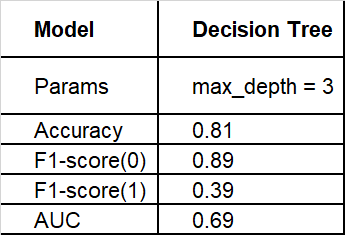

Based on our results, **Decision Tree** was the best performer with an AUC score of 0.69.

**Best Parameter for each model**:

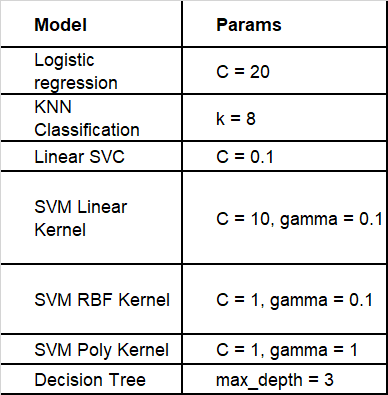

Thus, implementing decision Tree Classifier:

### **Decision Tree Classifier**

In [161]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
predictions = cart.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, cart.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.722
AUC: 0.5870883248849678
Confusion Matrix: [[646 135]
 [143  76]]
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       781
         1.0       0.36      0.35      0.35       219

    accuracy                           0.72      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.72      0.72      0.72      1000



In [162]:
param5 = {'max_depth': [1,3, 5, 7, 10]}
clf5 = GridSearchCV(DecisionTreeClassifier(), param5,'roc_auc',refit=True,cv=3)
clf5.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf5.best_score_, clf5.best_params_))

Best roc_auc: 0.687, with best C: {'max_depth': 3}


In [163]:
y_pred = clf5.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.807
[[745  36]
 [157  62]]
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       781
         1.0       0.63      0.28      0.39       219

    accuracy                           0.81      1000
   macro avg       0.73      0.62      0.64      1000
weighted avg       0.78      0.81      0.78      1000



# **PROJECT 2**

### Importing the libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import glob

import sklearn
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1. Hard voting and soft voting

In [62]:
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

features, target = make_moons(n_samples=500, noise=0.30, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=0)

log_clf = LogisticRegression(C=20)
log_clf.fit(X_train, y_train)

knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)

lsvc = LinearSVC(C=1)
lsvc.fit(X_train, y_train)

svm_linear_clf = SVC(C = 10, kernel = 'linear', gamma=0.1, probability = True)
svm_linear_clf.fit(X_train, y_train)

svm_rbf_clf = SVC(C = 1, kernel = 'rbf', gamma=0.1, probability = True)
svm_rbf_clf.fit(X_train, y_train)

svm_poly_clf = SVC(C = 1, kernel = 'poly', gamma=0.1, probability = True)
svm_poly_clf.fit(X_train, y_train)

dt_clf = DecisionTreeClassifier(max_depth = 7)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 1.1. Hard voting

In [63]:
#Hard voting
voting_hard_clf = VotingClassifier(estimators=[('log_clf', log_clf), 
                                               ('knn_clf',knn_clf),
                                               ('lsvc',lsvc),
                                               ('svm_linear_clf',svm_linear_clf),
                                               ('svm_rbf_clf',svm_rbf_clf),
                                               ('svm_poly_clf',svm_poly_clf),
                                               ('dt_clf', dt_clf)], 
                                   voting='hard')
voting_hard_clf.fit(X_train, y_train)

y_pred = voting_hard_clf.predict(X_test)
print('Accuracy Score',accuracy_score(y_test, y_pred))
print('Confusion Matrix',confusion_matrix(y_test, y_pred))
print('Classification Report',classification_report(y_test, y_pred))
print('ROC AUC score',roc_auc_score(y_test, y_pred))

Accuracy Score 0.835
Confusion Matrix [[82 13]
 [20 85]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.86      0.83        95
           1       0.87      0.81      0.84       105

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200

ROC AUC score 0.8363408521303258


### 1.2. Soft voting

In [64]:
voting_soft_clf = VotingClassifier(estimators=[('log_clf', log_clf), 
                                               ('knn_clf',knn_clf),
                                               ('svm_linear_clf',svm_linear_clf),
                                               ('svm_rbf_clf',svm_rbf_clf),
                                               ('svm_poly_clf',svm_poly_clf),
                                               ('dt_clf', dt_clf)], 
                                   voting='soft')
voting_soft_clf.fit(X_train, y_train)

y_pred_soft = voting_soft_clf.predict(X_test)
print('Accuracy Score',accuracy_score(y_test, y_pred_soft))
print('Confusion Matrix',confusion_matrix(y_test, y_pred_soft))
print('Classification Report',classification_report(y_test, y_pred_soft))
print('ROC AUC Score:',roc_auc_score(y_test, y_pred_soft))

Accuracy Score 0.84
Confusion Matrix [[82 13]
 [19 86]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.86      0.84        95
           1       0.87      0.82      0.84       105

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

ROC AUC Score: 0.8411027568922306


### 2. Bagging and Pasting.

### 2.1. Bagging for Logistic Regression

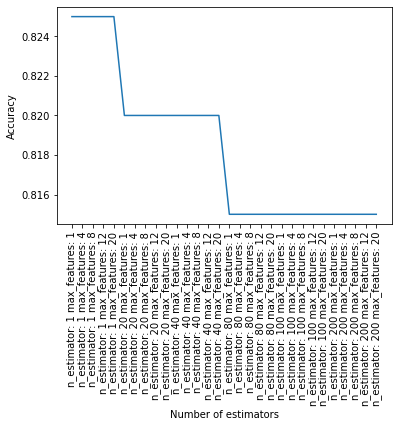

In [65]:
n_estimators = [1,20,40,80,100,200]
max_features = [1,4,8,12,20]
params=[]
accuracy = []

for estimator in n_estimators:
    for features in max_features:
        clf = BaggingClassifier(LogisticRegression(random_state=0, C=20), \
                                n_estimators=estimator, \
                               bootstrap=True, random_state=0, oob_score=True)
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" max_features: "+str(features))
        accuracy.append(acc)
    
plt.plot(params, accuracy)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

In [66]:
tuned_parameters = {"n_estimators": [1,20,40,80,100,200],
                    "max_features":[1,4,8,12,20],
                    "max_samples": [0.5,0.1],
                    }
dt = DecisionTreeClassifier(random_state=0, max_depth = 7)
dt_bag_grid = GridSearchCV(BaggingClassifier(dt, bootstrap=True, random_state=0, oob_score=True),tuned_parameters)
dt_bag_grid_model = dt_bag_grid.fit(X_train,y_train)

print('Best roc_auc: {:.4}, with best estimators {}'.format(dt_bag_grid_model.best_score_, dt_bag_grid_model.best_params_))

y_pred = dt_bag_grid_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best roc_auc: 0.8867, with best estimators {'max_features': 1, 'max_samples': 0.1, 'n_estimators': 200}
0.855
[[83 12]
 [17 88]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        95
           1       0.88      0.84      0.86       105

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



### 2.2. Pasting for Logistic Regression

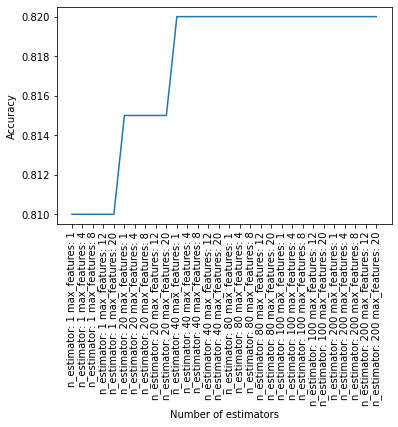

In [67]:
n_estimators = [1,20,40,80,100,200]
max_features = [1,4,8,12,20]
params=[]
accuracy = []

for estimator in n_estimators:
    for features in max_features:
        clf = BaggingClassifier(LogisticRegression(random_state=0, C=20), \
                                bootstrap=False, random_state=0, \
                                max_samples=0.5, \
                                n_estimators=estimator)
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" max_features: "+str(features))
        accuracy.append(acc)
    
plt.plot(params, accuracy)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

In [68]:

tuned_parameters = {"n_estimators": [1,20,40,80,100,200],
                    "max_features": [1,4,8,12,20],
                    "max_samples": [0.5,0.1],
                    }
log_reg = LogisticRegression(random_state=0, C=20)
log_reg_paste_grid = GridSearchCV(BaggingClassifier(log_reg, bootstrap=False, random_state=0),tuned_parameters)
log_reg_paste_grid_model = log_reg_paste_grid.fit(X_train,y_train)

print('Best roc_auc: {:.4}, with best estimators {}'.format(log_reg_paste_grid_model.best_score_, log_reg_paste_grid_model.best_params_))

y_pred = log_reg_paste_grid_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best roc_auc: 0.8667, with best estimators {'max_features': 1, 'max_samples': 0.5, 'n_estimators': 40}
0.825
[[80 15]
 [20 85]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        95
           1       0.85      0.81      0.83       105

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



### 2.3. Bagging for Decision Tree

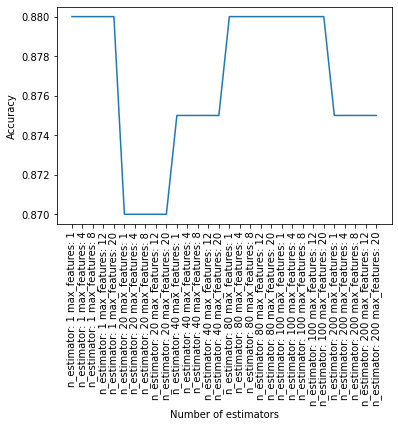

In [69]:
n_estimators = [1,20,40,80,100,200]
max_features = [1,4,8,12,20]
params=[]
accuracy = []

for estimator in n_estimators:
    for features in max_features:
        clf = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth = 7), \
                                max_samples=0.5, \
                                n_estimators=estimator, \
                               bootstrap=True, random_state=0, oob_score=True)
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" max_features: "+str(features))
        accuracy.append(acc)
    
plt.plot(params, accuracy)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

In [70]:
tuned_parameters = {"n_estimators": [1,20,40,80,100,200],
                    "max_features":[1,4,8,12,20],
                    "max_samples": [0.5,0.1],
                    }
dt = DecisionTreeClassifier(random_state=0, max_depth = 7)
dt_bag_grid = GridSearchCV(BaggingClassifier(dt, bootstrap=True, random_state=0, oob_score=True),tuned_parameters)
dt_bag_grid_model = dt_bag_grid.fit(X_train,y_train)

print('Best roc_auc: {:.4}, with best estimators {}'.format(dt_bag_grid_model.best_score_, dt_bag_grid_model.best_params_))

y_pred = dt_bag_grid_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best roc_auc: 0.8867, with best estimators {'max_features': 1, 'max_samples': 0.1, 'n_estimators': 200}
0.855
[[83 12]
 [17 88]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        95
           1       0.88      0.84      0.86       105

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



### 2.4. Pasting for Decision Trees

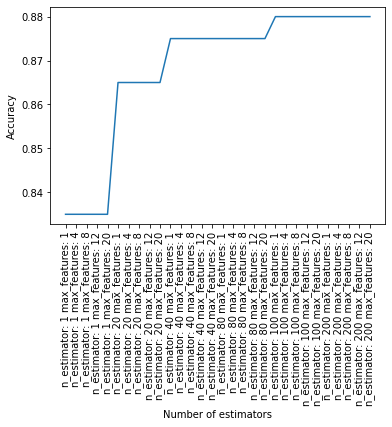

In [71]:
n_estimators = [1,20,40,80,100,200]
max_features = [1,4,8,12,20]
params=[]
accuracy = []

for estimator in n_estimators:
    for features in max_features:
        clf = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth = 7), \
                                bootstrap=False, random_state=0, \
                                max_samples=0.5, \
                                n_estimators=estimator)
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" max_features: "+str(features))
        accuracy.append(acc)
    
plt.plot(params, accuracy)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

In [72]:
tuned_parameters = {"n_estimators": [50,100,200,500],
                    "max_features":[1,2,4,6,8],
                    "max_samples": [0.5,0.1],
                    }
dt = DecisionTreeClassifier(random_state=0, max_depth = 7)
dt_paste_grid = GridSearchCV(BaggingClassifier(dt, bootstrap=False, random_state=0),tuned_parameters)
dt_paste_grid_model = dt_paste_grid.fit(X_train,y_train)

print('Best roc_auc: {:.4}, with best estimators {}'.format(dt_paste_grid_model.best_score_, dt_paste_grid_model.best_params_))

y_pred = dt_paste_grid_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best roc_auc: 0.9067, with best estimators {'max_features': 2, 'max_samples': 0.5, 'n_estimators': 50}
0.88
[[86  9]
 [15 90]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        95
           1       0.91      0.86      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



### 3. AdaBoost boosting

### 3.1. AdaBoost boosting for Decision Tree

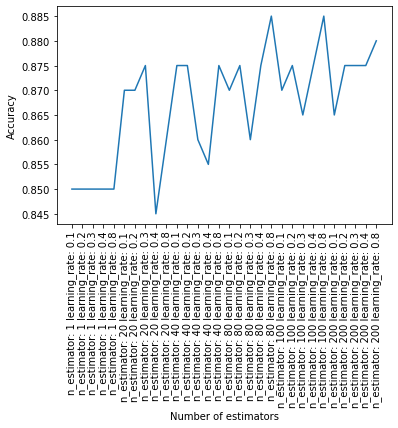

In [73]:
n_estimators = [1,20,40,80,100,200]
learning_rate = [0.1,0.2,0.3,0.4,0.8]
params=[]
accuracy = []

for estimator in n_estimators:
    for l_rate in learning_rate:
        clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth = 7), \
                                 random_state=0, \
                                 n_estimators = estimator, \
                                 learning_rate = l_rate, \
                                 algorithm = "SAMME"
                                )
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" learning_rate: "+str(l_rate))
        accuracy.append(acc)
    
plt.plot(params, accuracy)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

In [74]:
tuned_parameters = {"n_estimators": [50,100,200,500],
                    "learning_rate":[0.4,0.5,0.6,0.7,0.8,0.9],
                    "algorithm":["SAMME.R","SAMME"],
                    }
dt = DecisionTreeClassifier(random_state=0, max_depth = 7)
dt_ada_grid = GridSearchCV(AdaBoostClassifier(dt, random_state=0),tuned_parameters)
dt_ada_grid_model = dt_ada_grid.fit(X_train,y_train)

print('Best roc_auc: {:.4}, with best estimators {}'.format(dt_ada_grid_model.best_score_, dt_ada_grid_model.best_params_))

y_pred = dt_ada_grid_model.predict(X_test)
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Confusion Matrix', confusion_matrix(y_test, y_pred))
print('Classification Matrix', classification_report(y_test, y_pred))

Best roc_auc: 0.89, with best estimators {'algorithm': 'SAMME', 'learning_rate': 0.9, 'n_estimators': 50}
Accuracy Score 0.875
Confusion Matrix [[85 10]
 [15 90]]
Classification Matrix               precision    recall  f1-score   support

           0       0.85      0.89      0.87        95
           1       0.90      0.86      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



### 3.2. AdaBoost boosting for Logistic Regression

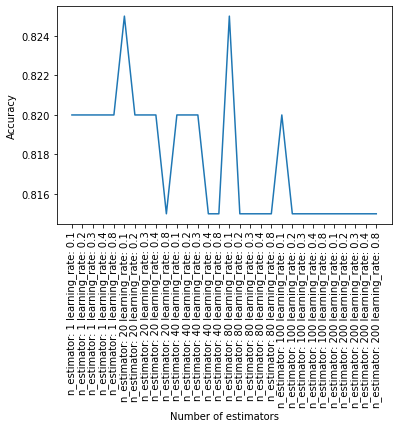

In [ ]:
n_estimators = [1,20,40,80,100,200]
learning_rate = [0.1,0.2,0.3,0.4,0.8]
params=[]
accuracy = []

for estimator in n_estimators:
    for l_rate in learning_rate:
        clf = AdaBoostClassifier(LogisticRegression(random_state=0, C=20), \
                                 random_state=0, \
                                 n_estimators = estimator, \
                                 learning_rate = l_rate, \
                                 algorithm = "SAMME.R"
                                )
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" learning_rate: "+str(l_rate))
        accuracy.append(acc)
    
plt.plot(params, accuracy)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.show()

In [75]:
tuned_parameters = {"n_estimators": [50,100,200,500],
                    "learning_rate":[0.4,0.5,0.6,0.7,0.8,0.9],
                    "algorithm":["SAMME.R","SAMME"],
                    }
log_reg = LogisticRegression(random_state=0, C=20)
log_reg_ada_grid = GridSearchCV(AdaBoostClassifier(log_reg, random_state=0),tuned_parameters)
log_reg_ada_grid_model = log_reg_ada_grid.fit(X_train,y_train)

print('Best roc_auc: {:.4}, with best estimators {}'.format(log_reg_ada_grid_model.best_score_, log_reg_ada_grid_model.best_params_))

y_pred = log_reg_ada_grid_model.predict(X_test)
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Confusion Matrix', confusion_matrix(y_test, y_pred))
print('Classification Report', classification_report(y_test, y_pred))

Best roc_auc: 0.8733, with best estimators {'algorithm': 'SAMME', 'learning_rate': 0.6, 'n_estimators': 50}
Accuracy Score 0.825
Confusion Matrix [[79 16]
 [19 86]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82        95
           1       0.84      0.82      0.83       105

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



### 4. Gradient boosting

In [76]:
tuned_parameters = {"max_depth": [3,5,6,7],
                    "max_features":['auto', 'sqrt', 'log2'],
                    "learning_rate":[0.05,0.1,0.2,0.6,0.8,1],
                    "n_estimators": range(100,1001,100)}

grad_boost_grid = GridSearchCV(GradientBoostingClassifier(random_state=0),tuned_parameters)
grad_boost_grid_model = grad_boost_grid.fit(X_train,y_train)

print('Best roc_auc: {:.4}, with best estimators {}'.format(grad_boost_grid_model.best_score_, grad_boost_grid_model.best_params_))

y_pred = grad_boost_grid_model.predict(X_test)
print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Confusion Matrix', confusion_matrix(y_test, y_pred))
print('Classification Report',classification_report(y_test, y_pred))

Best roc_auc: 0.9, with best estimators {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy Score 0.88
Confusion Matrix [[86  9]
 [15 90]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.91      0.88        95
           1       0.91      0.86      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



### 5. Principle Component Analysis(PCA)

In [156]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0)
pca.fit(X_train)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [78]:
X_train_pca

array([[ 8.11964046e-01, -2.84404811e-02],
       [ 6.44631318e-01,  1.69116411e-01],
       [-6.92866896e-01,  3.29476026e-02],
       [ 3.74482034e-01, -2.69387539e-01],
       [-2.73439470e-01,  5.36262525e-01],
       [-5.38778777e-01, -5.51310017e-01],
       [ 1.21949663e+00,  3.07399270e-01],
       [ 7.24298380e-02,  3.50404524e-01],
       [ 4.84957110e-01,  1.72725573e-01],
       [ 1.78028874e+00, -6.23809327e-01],
       [ 7.53361716e-01, -5.32873399e-01],
       [-1.57127064e+00, -3.31536749e-01],
       [-1.59674769e-01, -5.64987694e-02],
       [ 1.00944730e+00,  1.02258138e+00],
       [-2.13656214e-01,  1.96134481e-01],
       [-5.24128295e-01, -5.93779514e-01],
       [ 4.41777869e-01,  3.94641904e-01],
       [-3.11015366e-01,  2.21370035e-01],
       [ 1.60578688e-01, -3.32012153e-01],
       [-2.74310808e-02, -1.12750922e-01],
       [ 1.39324627e+00,  3.06047520e-01],
       [ 1.10519373e+00, -1.24217515e-01],
       [-1.12370923e+00,  6.69352681e-01],
       [ 6.

In [79]:
X_test_pca

array([[-1.44221871,  0.34546299],
       [-0.55367945, -0.55704287],
       [-0.95546176,  0.31320273],
       [-1.36891831, -0.00506873],
       [-0.25031668,  0.82053762],
       [ 0.90884558,  0.60608113],
       [-1.17270186, -1.00059162],
       [ 0.23668418, -0.05813242],
       [-0.01646345,  0.27601269],
       [ 1.26783648, -0.85487325],
       [-1.04196203, -0.60767975],
       [ 1.55945266, -0.57882241],
       [-0.07927401,  0.0675899 ],
       [-1.28958245,  0.41888585],
       [-1.45305754,  0.02006541],
       [-0.72693334,  0.16278674],
       [-1.26328887, -0.52757326],
       [ 1.2704726 , -0.95937168],
       [-0.39971519, -0.0847531 ],
       [ 0.79115393, -0.12303481],
       [-0.99939099,  0.44873649],
       [ 0.05473926, -0.66038826],
       [-0.7697888 , -0.22945501],
       [ 0.06798926,  0.14639684],
       [ 0.98957707,  0.08024433],
       [ 0.09201766,  0.14673672],
       [ 0.8482478 ,  0.60197424],
       [ 0.67825526,  0.49379146],
       [-0.03396792,

In [80]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.76340593, 0.23659407])

### 5.1 Logistic Regression with PCA

In [84]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
predictions = lr.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, lr.predict_proba(X_test_pca)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.555
AUC: 0.9214035087719299
Confusion Matrix: [[24 71]
 [18 87]]
              precision    recall  f1-score   support

           0       0.57      0.25      0.35        95
           1       0.55      0.83      0.66       105

    accuracy                           0.56       200
   macro avg       0.56      0.54      0.51       200
weighted avg       0.56      0.56      0.51       200



In [85]:
logreg = LogisticRegression(class_weight='balanced')
param1 = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20,100,1000]}
clf1 = GridSearchCV(logreg,param1,scoring='roc_auc',refit=True,cv=5)
clf1.fit(X_train_pca,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf1.best_score_, clf1.best_params_))

Best roc_auc: 0.9337, with best C: {'C': 1}


In [86]:
y_pred = clf1.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.82
[[80 15]
 [21 84]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        95
           1       0.85      0.80      0.82       105

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



### 5.2 KNN with PCA

In [87]:
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
predictions = knn.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, knn.predict_proba(X_test_pca)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.535
AUC: 0.9464661654135338
Confusion Matrix: [[26 69]
 [24 81]]
              precision    recall  f1-score   support

           0       0.52      0.27      0.36        95
           1       0.54      0.77      0.64       105

    accuracy                           0.54       200
   macro avg       0.53      0.52      0.50       200
weighted avg       0.53      0.54      0.50       200



In [88]:
k_range = list(range(1, 11))
knn = KNeighborsClassifier()
param2 = dict(n_neighbors=k_range)
clf2 = GridSearchCV(knn, param2,'roc_auc',refit=True,cv=3)
clf2.fit(X_train_pca,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf2.best_score_, clf2.best_params_))

Best roc_auc: 0.9555, with best C: {'n_neighbors': 7}


In [89]:
y_pred = clf2.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.875
[[85 10]
 [15 90]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        95
           1       0.90      0.86      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



### 5.3 Decision Tree with PCA

In [90]:
cart = DecisionTreeClassifier()
cart.fit(X_train_pca, y_train)
predictions = cart.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, cart.predict_proba(X_test_pca)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.49
AUC: 0.8639097744360902
Confusion Matrix: [[19 76]
 [26 79]]
              precision    recall  f1-score   support

           0       0.42      0.20      0.27        95
           1       0.51      0.75      0.61       105

    accuracy                           0.49       200
   macro avg       0.47      0.48      0.44       200
weighted avg       0.47      0.49      0.45       200



In [91]:
param5 = {'max_depth': [1,3, 5, 7, 10]}
clf5 = GridSearchCV(DecisionTreeClassifier(), param5,'roc_auc',refit=True,cv=3)
clf5.fit(X_train_pca,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf5.best_score_, clf5.best_params_))

Best roc_auc: 0.9193, with best C: {'max_depth': 3}


In [92]:
# Testing dataset
y_pred = clf5.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.87
[[85 10]
 [16 89]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        95
           1       0.90      0.85      0.87       105

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



### 5.4 Linear Support Vector machine with PCA

In [93]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [94]:
lsvc = LinearSVC()
lsvc.fit(X_train_pca, y_train)
predictions = lsvc.predict(X_test_pca)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.825
Confusion Matrix: [[81 14]
 [21 84]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        95
           1       0.86      0.80      0.83       105

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



In [95]:
param4 = {"C": [0.01, 0.1, 1.0]}
lsvc = LinearSVC()
clf4 = GridSearchCV(lsvc, param4,'roc_auc',refit=True,cv=3)
clf4.fit(X_train_pca,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf4.best_score_, clf4.best_params_))

Best roc_auc: 0.9343, with best C: {'C': 1.0}


In [96]:
y_pred = clf4.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.825
[[81 14]
 [21 84]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        95
           1       0.86      0.80      0.83       105

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



### 5.5 Kernalized Support Vector Model with PCA

### 5.5.1. Polynomial Kernel with PCA

In [97]:
SVC_poly = SVC(kernel='poly', probability=True)
SVC_poly.fit(X_train_pca, y_train)
predictions = SVC_poly.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, SVC_poly.predict_proba(X_test_pca)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.535
AUC: 0.9288721804511277
Confusion Matrix: [[30 65]
 [28 77]]
              precision    recall  f1-score   support

           0       0.52      0.32      0.39        95
           1       0.54      0.73      0.62       105

    accuracy                           0.54       200
   macro avg       0.53      0.52      0.51       200
weighted avg       0.53      0.54      0.51       200



In [98]:
param_poly = {'C':[1],'gamma':[0.1, 1], 'kernel':['poly']}
svc = SVC()
clf_poly = GridSearchCV(svc, param_poly,'roc_auc',refit=True,cv=3)
clf_poly.fit(X_train_pca,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf_poly.best_score_, clf_poly.best_params_))

Best roc_auc: 0.941, with best C: {'C': 1, 'gamma': 1, 'kernel': 'poly'}


In [99]:
y_pred = clf_poly.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.825
[[89  6]
 [29 76]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        95
           1       0.93      0.72      0.81       105

    accuracy                           0.82       200
   macro avg       0.84      0.83      0.82       200
weighted avg       0.84      0.82      0.82       200



### 5.5.2. Gaussian Kernel with PCA

In [100]:
SVC_rbf = SVC(kernel='rbf', probability=True)
SVC_rbf.fit(X_train_pca, y_train)
predictions = SVC_rbf.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, SVC_rbf.predict_proba(X_test_pca)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.555
AUC: 0.952280701754386
Confusion Matrix: [[26 69]
 [20 85]]
              precision    recall  f1-score   support

           0       0.57      0.27      0.37        95
           1       0.55      0.81      0.66       105

    accuracy                           0.56       200
   macro avg       0.56      0.54      0.51       200
weighted avg       0.56      0.56      0.52       200



In [101]:
param_rbf = {'C':[0.1, 1, 10],'gamma':[0.1, 1, 10], 'kernel':['rbf']}
svc = SVC()
clf_rbf = GridSearchCV(svc, param_rbf,'roc_auc',refit=True,cv=3)
clf_rbf.fit(X_train_pca,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf_rbf.best_score_, clf_rbf.best_params_))

Best roc_auc: 0.9648, with best C: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [102]:
y_pred = clf_rbf.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.88
[[87  8]
 [16 89]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        95
           1       0.92      0.85      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



### 5.5.3. Linear Kernel with PCA

In [103]:
SVC_linear = SVC(kernel='linear', probability=True)
SVC_linear.fit(X_train_pca, y_train)
predictions = SVC_linear.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, SVC_linear.predict_proba(X_test_pca)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.555
AUC: 0.921704260651629
Confusion Matrix: [[28 67]
 [22 83]]
              precision    recall  f1-score   support

           0       0.56      0.29      0.39        95
           1       0.55      0.79      0.65       105

    accuracy                           0.56       200
   macro avg       0.56      0.54      0.52       200
weighted avg       0.56      0.56      0.53       200



In [104]:
param3 = {'C':[0.1, 1, 10],'gamma':[0.1, 1, 10], 'kernel':['linear']}
svc = SVC()
clf3 = GridSearchCV(svc, param3,'roc_auc',refit=True,cv=3)
clf3.fit(X_train_pca,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf3.best_score_, clf3.best_params_))

Best roc_auc: 0.935, with best C: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


In [105]:
y_pred = clf3.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.825
[[82 13]
 [22 83]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        95
           1       0.86      0.79      0.83       105

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



## Observation:
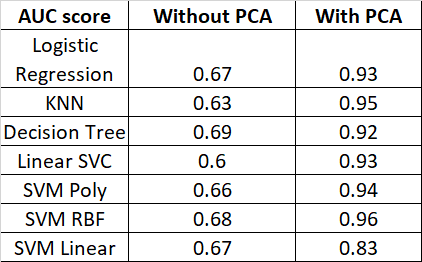

We can see from the above table that PCA helps in getting better results.

### 6.  Kernel PCA 

### 6.1 KernelPCA - Linear

In [164]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=8, kernel='linear')
X_transformed_train = transformer.fit_transform(X_train)
X_transformed_test = transformer.fit_transform(X_test)

### 6.1.1. KernelPCA Linear for Logistic Regression

In [165]:
lr = LogisticRegression()
lr.fit(X_transformed_train, y_train)
predictions = lr.predict(X_transformed_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, lr.predict_proba(X_transformed_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.773
AUC: 0.5722905302299476
Confusion Matrix: [[763  18]
 [209  10]]
              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87       781
         1.0       0.36      0.05      0.08       219

    accuracy                           0.77      1000
   macro avg       0.57      0.51      0.48      1000
weighted avg       0.69      0.77      0.70      1000



### 6.1.2. KernelPCA Linear for Decision Tree Classifier

In [166]:
cart = DecisionTreeClassifier()
cart.fit(X_transformed_train, y_train)
predictions = cart.predict(X_transformed_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, cart.predict_proba(X_transformed_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.648
AUC: 0.552856366091944
Confusion Matrix: [[564 217]
 [135  84]]
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       781
         1.0       0.28      0.38      0.32       219

    accuracy                           0.65      1000
   macro avg       0.54      0.55      0.54      1000
weighted avg       0.69      0.65      0.67      1000



### 6.2. KernelPCA - Sigmoid

In [167]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=8, kernel='sigmoid')
X_transformed_train = transformer.fit_transform(X_train)
X_transformed_test = transformer.fit_transform(X_test)

### 6.2.1 KernelPCA Sigmoid for Logistic regression

In [168]:
lr = LogisticRegression()
lr.fit(X_transformed_train, y_train)
predictions = lr.predict(X_transformed_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, lr.predict_proba(X_transformed_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.781
AUC: 0.624231900326826
Confusion Matrix: [[781   0]
 [219   0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       781
         1.0       0.00      0.00      0.00       219

    accuracy                           0.78      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.61      0.78      0.68      1000



### 6.2.2. KernelPCA Sigmoid for Decision Tree Classifier

In [169]:
cart = DecisionTreeClassifier()
cart.fit(X_transformed_train, y_train)
predictions = cart.predict(X_transformed_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, cart.predict_proba(X_transformed_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.664
AUC: 0.5417419418962927
Confusion Matrix: [[593 188]
 [148  71]]
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       781
         1.0       0.27      0.32      0.30       219

    accuracy                           0.66      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.69      0.66      0.67      1000



### 6.3. KernelPCA - rbf

In [170]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=8, kernel='rbf')
X_transformed_train = transformer.fit_transform(X_train)
X_transformed_test = transformer.fit_transform(X_test)

### 6.3.1.  KernelPCA - rbf for Logistic Regression

In [171]:
lr = LogisticRegression()
lr.fit(X_transformed_train, y_train)
predictions = lr.predict(X_transformed_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, lr.predict_proba(X_transformed_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.779
AUC: 0.6357614345266285
Confusion Matrix: [[778   3]
 [218   1]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       781
         1.0       0.25      0.00      0.01       219

    accuracy                           0.78      1000
   macro avg       0.52      0.50      0.44      1000
weighted avg       0.66      0.78      0.69      1000



### 6.3.2. KernelPCA - rbf for Decision Tree Classifier

In [172]:
cart = DecisionTreeClassifier()
cart.fit(X_transformed_train, y_train)
predictions = cart.predict(X_transformed_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, cart.predict_proba(X_transformed_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.672
AUC: 0.5682212828653115
Confusion Matrix: [[588 193]
 [135  84]]
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78       781
         1.0       0.30      0.38      0.34       219

    accuracy                           0.67      1000
   macro avg       0.56      0.57      0.56      1000
weighted avg       0.70      0.67      0.68      1000



### 6.4. KernelPCA - poly

In [173]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=8, kernel='poly')
X_transformed_train = transformer.fit_transform(X_train)
X_transformed_test = transformer.fit_transform(X_test)

### 6.4.1. KernelPCA - poly for Logistic Regression

In [174]:
lr = LogisticRegression()
lr.fit(X_transformed_train, y_train)
predictions = lr.predict(X_transformed_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, lr.predict_proba(X_transformed_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.78
AUC: 0.5704079186618257
Confusion Matrix: [[779   2]
 [218   1]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       781
         1.0       0.33      0.00      0.01       219

    accuracy                           0.78      1000
   macro avg       0.56      0.50      0.44      1000
weighted avg       0.68      0.78      0.69      1000



### 6.4.2. KernelPCA - poly for Decision Tree Classifier

In [175]:
cart = DecisionTreeClassifier()
cart.fit(X_transformed_train, y_train)
predictions = cart.predict(X_transformed_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, cart.predict_proba(X_transformed_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.671
AUC: 0.5527949765842877
Confusion Matrix: [[596 185]
 [144  75]]
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78       781
         1.0       0.29      0.34      0.31       219

    accuracy                           0.67      1000
   macro avg       0.55      0.55      0.55      1000
weighted avg       0.69      0.67      0.68      1000



### 6.5. KernelPCA - cosine

In [176]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=8, kernel='cosine')
X_transformed_train = transformer.fit_transform(X_train)
X_transformed_test = transformer.fit_transform(X_test)

### 6.5.1. KernelPCA - cosine for Logistic Regression

In [177]:
lr = LogisticRegression()
lr.fit(X_transformed_train, y_train)
predictions = lr.predict(X_transformed_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, lr.predict_proba(X_transformed_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.777
AUC: 0.6520559638445033
Confusion Matrix: [[773   8]
 [215   4]]
              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       781
         1.0       0.33      0.02      0.03       219

    accuracy                           0.78      1000
   macro avg       0.56      0.50      0.45      1000
weighted avg       0.68      0.78      0.69      1000



### 6.5.2. KernelPCA - cosine for Decision Tree classifier

In [178]:
cart = DecisionTreeClassifier()
cart.fit(X_transformed_train, y_train)
predictions = cart.predict(X_transformed_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, cart.predict_proba(X_transformed_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.697
AUC: 0.5628687024596729
Confusion Matrix: [[626 155]
 [148  71]]
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       781
         1.0       0.31      0.32      0.32       219

    accuracy                           0.70      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.70      0.70      0.70      1000



### 7. Deep Learning Models

### Multi-layer Perceptron(MLP)

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target)
X_train.shape

(1874, 23)

In [149]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score
import tensorflow as tf

def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

classifier = Sequential()

classifier.add(Dense(100, kernel_initializer='normal', activation= 'relu', input_dim=23))
classifier.add(Dense(50, kernel_initializer='normal', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='normal', activation= 'softplus'))
classifier.add(Dense(1, kernel_initializer= 'normal', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=[auroc])
classifier.fit(X_train, y_train, epochs= 20, batch_size=50)

y_pred = classifier.predict(X_test)
print('Accuracy Score',accuracy_score(y_test, y_pred.round(), normalize = False))
print('Confusion Matrix',confusion_matrix(y_test, y_pred.round()))
print('Classification Report',classification_report(y_test, y_pred.round()))
print('ROC AUC', roc_auc_score(y_test, classifier.predict_proba(X_test)))

Epoch 1/20
30/30 [==============================] - 1s 4ms/step - loss: 0.7163 - auroc: 0.4846
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5210 - auroc: 0.4533
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5162 - auroc: 0.4744
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5336 - auroc: 0.5333
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5088 - auroc: 0.6031
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4931 - auroc: 0.6477
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4799 - auroc: 0.6454
Epoch 8/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4705 - auroc: 0.6705
Epoch 9/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5001 - auroc: 0.6801
Epoch 10/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4667 - auroc: 0.6820
Epoch 11/20
30/30 [==============================

# CONCLUSION:
From the above results, we compare the models by their AUC score, and observe that:

### 1. Basic Models(Project1):
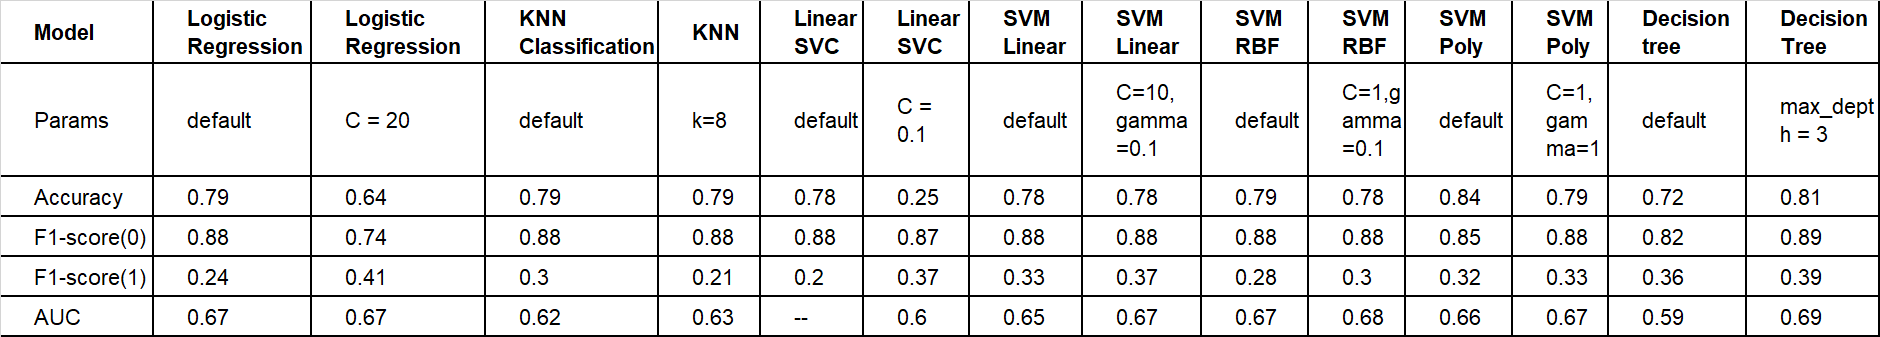

### 2. Ensembling:
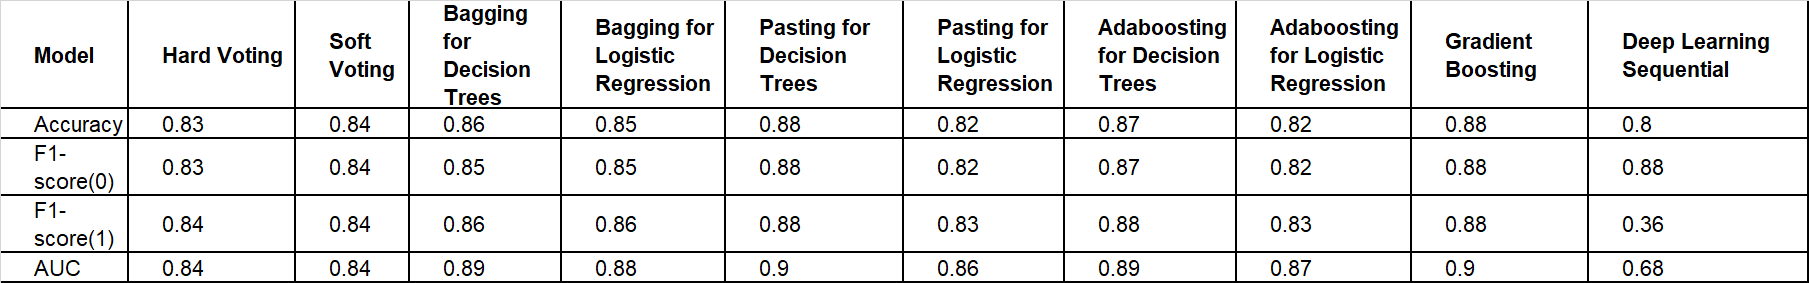

### 3. PCA:
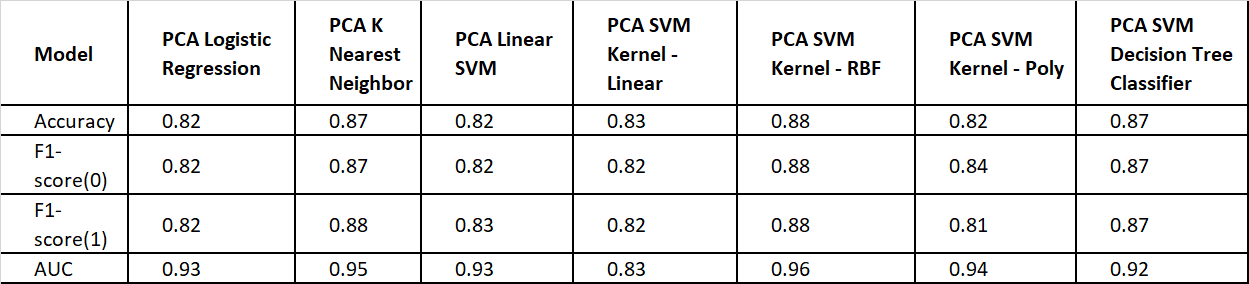

### 4. Kernelized PCA
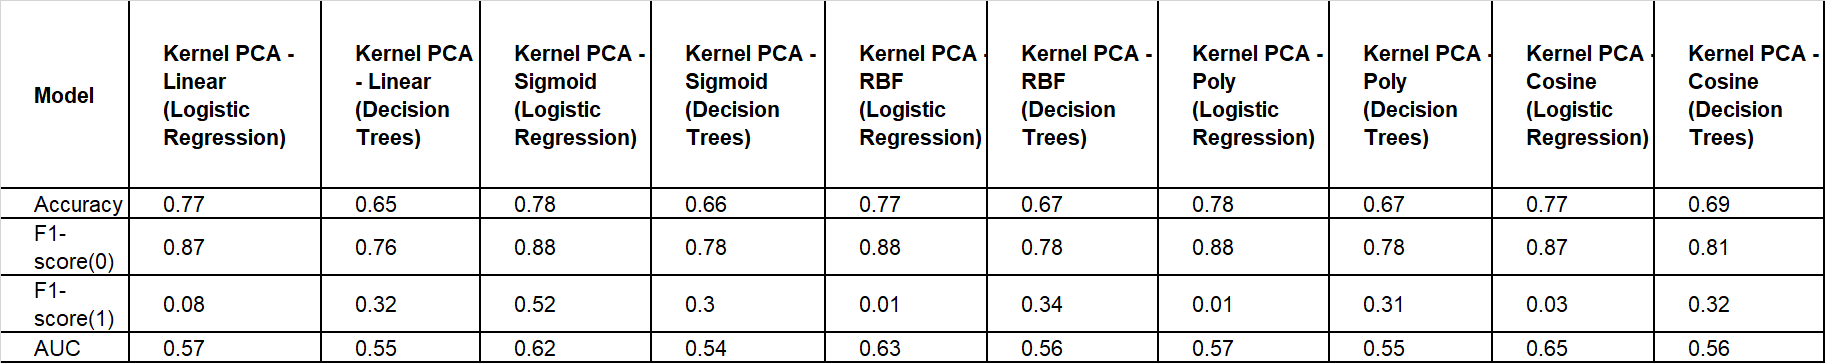

Comparing all the models with default parameters, parameter tuning, ensembling, PCA and Deep Learning techniques, we come to a conclusion that **SVM with Gaussian Kernel with PCA** is the best model with the maximum AUC. Therefore, we would like to conclude our project and select SVM with Gaussian Kernel with PCA with default parameters as the best model to implement classification and predict if a cardholder is likely to default on their credit card.

### Gaussian Kernel with PCA

In [157]:
SVC_rbf = SVC(kernel='rbf', probability=True)
SVC_rbf.fit(X_train_pca, y_train)
predictions = SVC_rbf.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, SVC_rbf.predict_proba(X_test_pca)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.766
AUC: 0.6508837165792597
Confusion Matrix: [[763  18]
 [216   3]]
              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87       781
         1.0       0.14      0.01      0.03       219

    accuracy                           0.77      1000
   macro avg       0.46      0.50      0.45      1000
weighted avg       0.64      0.77      0.68      1000



In [158]:
param_rbf = {'C':[0.1, 1, 10],'gamma':[0.1, 1, 10], 'kernel':['rbf']}
svc = SVC()
clf_rbf = GridSearchCV(svc, param_rbf,'roc_auc',refit=True,cv=3)
clf_rbf.fit(X_train_pca,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf_rbf.best_score_, clf_rbf.best_params_))

Best roc_auc: 0.6793, with best C: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [159]:
y_pred = clf_rbf.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.781
[[781   0]
 [219   0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       781
         1.0       0.00      0.00      0.00       219

    accuracy                           0.78      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.61      0.78      0.68      1000

